In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from scipy.sparse import hstack
from sklearn.model_selection import train_test_split

class_names = ['toxic']

train = pd.read_csv('gdrive/My Drive/jigsaw-toxic-comment-classification-challenge/train.csv').fillna(' ')
test = pd.read_csv('gdrive/My Drive/jigsaw-toxic-comment-classification-challenge/test.csv').fillna(' ')

train_text = train['comment_text']
test_text = test['comment_text']
all_text = pd.concat([train_text, test_text])

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
    stop_words='english',
    ngram_range=(1, 1),
    max_features=10000)
word_vectorizer.fit(all_text)
train_features = word_vectorizer.transform(train_text)
test_features = word_vectorizer.transform(test_text)
#print(train_features.shape)
#print(test_features.shape)
#scores = []
train_target = train['toxic']
#nrow_train = train.shape[0]
X_train, X_test, Y_train, Y_test = train_test_split( train_features, train_target, test_size=0.2, random_state=42)

**Logistic Regression**

In [0]:
classifier = LogisticRegression(C=0.1, solver='sag')
classifier.fit(X_train, Y_train)
predictions = classifier.predict_proba(X_test)[:, 1]

roc_curve 0.9576527094454006


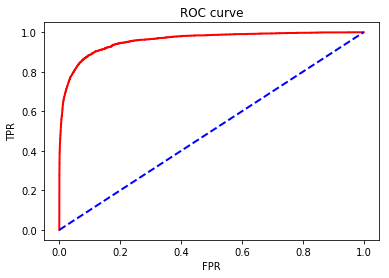

In [7]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, classification_report, accuracy_score


print("roc_curve {}".format(roc_auc_score(Y_test,predictions)));


##Computing false and true positive rates
fpr, tpr,_=roc_curve(Y_test,predictions)

import matplotlib.pyplot as plt
plt.figure()
##Adding the ROC
plt.plot(fpr, tpr, color='red',
 lw=2, label='ROC curve')
##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
##Title and label
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [8]:

for i in range(len(predictions)):
    if predictions[i]>0.5:
        predictions[i] = 1
    else:
        predictions[i] = 0

#print("do")

print("accuracy {}".format(accuracy_score(Y_test,predictions)));

print(classification_report(Y_test, predictions))
pd.DataFrame(confusion_matrix(Y_test, predictions),
   index = [['Actual', 'Actual'], ['Not Toxic', 'Toxic']],
   columns = [['Predicted', 'Predicted'], ['Not Toxic', 'Toxic']])

#print(conf)

accuracy 0.9374588751370829
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     28859
           1       0.98      0.36      0.52      3056

   micro avg       0.94      0.94      0.94     31915
   macro avg       0.96      0.68      0.74     31915
weighted avg       0.94      0.94      0.92     31915



Predicted      
                 Not Toxic Toxic
Actual Not Toxic     28832    27
       Toxic          1969  1087

**Naive Bayes **

In [0]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, classification_report, accuracy_score, precision_recall_fscore_support

gnb = MultinomialNB()
gnb.fit(X_train, Y_train)

predictions = gnb.predict(X_test)


In [10]:
#accuracy = accuracy_score(Y_test,predictions)
#precision, recall, fscore, support = precision_recall_fscore_support(Y_test,predictions, average = 'weighted')

#print('Train Accuracy -> ', train_accuracy)
#print('Accuracy -> ', accuracy)
#print('Precision -> ', precision)
#print('Recall -> ', recall)
#print('F-Score -> ', fscore)
#print('Support -> ', support)
print("accuracy {}".format(accuracy_score(Y_test,predictions)))
print(classification_report(Y_test, predictions))
pd.DataFrame(confusion_matrix(Y_test, predictions),
   index = [['Actual', 'Actual'], ['Not Toxic', 'Toxic']],
   columns = [['Predicted', 'Predicted'], ['Not Toxic', 'Toxic']])

accuracy 0.949114836283879
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     28859
           1       0.92      0.51      0.66      3056

   micro avg       0.95      0.95      0.95     31915
   macro avg       0.94      0.75      0.82     31915
weighted avg       0.95      0.95      0.94     31915



Predicted      
                 Not Toxic Toxic
Actual Not Toxic     28726   133
       Toxic          1491  1565

**SVM**

In [0]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

svm_model = svm.SVC(C = 0.1, kernel = 'linear')
svm_model.fit(X_train, Y_train)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [0]:
predictions = svm_model.predict(X_test)

#precision, recall, fscore, support = precision_recall_fscore_support(Y_test,predictions, average = 'weighted')

#print('Train Accuracy -> ', train_accuracy)
#print('Accuracy -> ', accuracy)
#print('Precision -> ', precision)
#print('Recall -> ', recall)
#print('F-Score -> ', fscore)
#print('Support -> ', support)
print("accuracy {}".format(accuracy_score(Y_test,predictions)));
print(classification_report(Y_test, predictions))
pd.DataFrame(confusion_matrix(Y_test, predictions),
   index = [['Actual', 'Actual'], ['Not Toxic', 'Toxic']],
   columns = [['Predicted', 'Predicted'], ['Not Toxic', 'Toxic']])

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     28859
           1       0.95      0.50      0.65      3056

   micro avg       0.95      0.95      0.95     31915
   macro avg       0.95      0.75      0.81     31915
weighted avg       0.95      0.95      0.94     31915



Predicted      
                 Not Toxic Toxic
Actual Not Toxic     28787    72
       Toxic          1537  1519